# 1. Importing ibraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import sklearn
import imblearn

# 2. Loading dataset

In [4]:
# ds_path = 'G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets'
# ds = os.path.join(ds_path,'titanic.csv')
# df = pd.read_csv(ds)

# 3. Performing initial data exploration

In [5]:
# df.head()
# df.tail()
# df.shape
# df.columns
# df.dtypes
# df.describe()
# df.info()
# df.unique()
# df.nunique()
# df.isna().sum()
# df.isnull().sum()
# df.value_counts()
# df.duplicated().sum()um()


# 4. Exploring variables

## 4.1 Types of variables
**4.1.a Categorical Variable:**

**4.1.aa Nominal:**
A nominal variable is a type of categorical variable that represents categories with no inherent order or ranking. In other words, the values of a nominal variable are labels or names used to identify different categories, and these categories do not have any numerical significance. Examples of nominal variables include gender, eye color, ethnicity, or types of fruits.

**4.1.ab Oridinal:**
An ordinal variable is a type of categorical variable that, unlike nominal variables, has a specific order or ranking. The categories of an ordinal variable represent a scale of values that indicate the relative order or position, but the intervals between the categories are not necessarily equal or meaningful. Eg: Educational attainment (e.g., high school diploma, bachelor's degree, master's degree), Socioeconomic status (e.g., lower class, middle class, upper class), Likert scales in surveys (e.g., strongly disagree, disagree, neutral, agree, strongly agree)

**4.1.b Discrete Variable:**
A discrete variable is one that can only take on distinct, separate values.
These values are typically whole numbers and are often counted in integers.
Examples of discrete variables include the number of students in a class, the number of cars in a parking lot, or the number of goals scored in a soccer game.
Discrete variables often result from counting or enumerating items.

**4.1.c Continuous Variable:**
A continuous variable can take on any value within a certain range.
These values are often measured and can include fractions or decimals.
Examples of continuous variables include height, weight, temperature, or time.
Continuous variables are associated with measurements and can take an infinite number of values within a given range.en range.in a given range.

# 5. Handling missing values

## 5.1 Types of missing Values
**5.1.1 MCAR (Missing Completely At Random)**:

* Imagine you have a dataset, and some of the values are missing. If the missing values are completely random, meaning there's no particular pattern to why they are missing, and it's not related to the values of other variables, then you have Missing Completely at Random (MCAR).

  
* In simple words, MCAR means that the likelihood of data being missing is the same for all observations, and it doesn't depend on the values that are missing or any other information in your dataset. It's like the missing values occurred randomly, and there's no systematic reason behind their absence.

* For example, if people forget to answer survey questions randomly, without being influenced by the content of the questions or any personal characteristics, then the missing data can be considered MCAR.

**5.1.2 MNAR (Missing Not At Random):**

* Imagine you have a dataset, and some values are missing. If the likelihood of data being missing depends on the unobserved values themselves, you might be dealing with Missing Not at Random (MNAR).

* In simple terms, MNAR means that the reason for data being missing is related to the values that are missing. There's some pattern or correlation between the missing values and the actual values you're trying to measure.

* For example, if in a health survey people with higher incomes are less likely to report their income accurately, then the income data becomes MNAR. The missing values are not random; they are influenced by the unobserved (true) income values.

**5.1.3 MAR (Missing At Random):**

* Imagine you have a dataset, and some values are missing. If the likelihood of data being missing depends only on the observed values and not on the unobserved values, you might be dealing with Missing at Random (MAR).

* In simple terms, MAR means that the missing values are not related to the values that are missing but are related to the observed values in your dataset. There's a systematic pattern to why certain values are missing, but this pattern is determined by the observed data, not the unobserved data.

* For example, in a survey, if men are less likely to report their weight than women, but this tendency is unrelated to the actual (unobserved) weight, then the missing weight data is MAR. The missingness is related to gender, which is observed, not directly to the weight, which is unobserved.

## 5.2 Handling Missing Values in Continuous features

### 5.2.1 Mean, Median, Mode Imputation:
   - **Method:** Replace missing values with the mean (for numerical data), median (for skewed or non-normally distributed numerical data), or mode (for categorical data).
   - **Use Case:** Appropriate for handling missing data under MCAR or MAR assumptions.

**Pros:**
* easy to implement
* robust to outliers (median)

**Cons:**
* may change original variance

In [6]:
df = pd.read_csv(ds,usecols=['Age','Fare','Survived'])
df.head()

NameError: name 'pd' is not defined

In [ ]:
# percentage of null of value in each column
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
def impute_nan(df,var):
    median = df[var].median()
    df[var+'median'] = df[var].fillna(median)

In [ ]:
impute_nan(df,'Age')

In [ ]:
df.head()

,Survived,Age,Fare,Agemedian
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


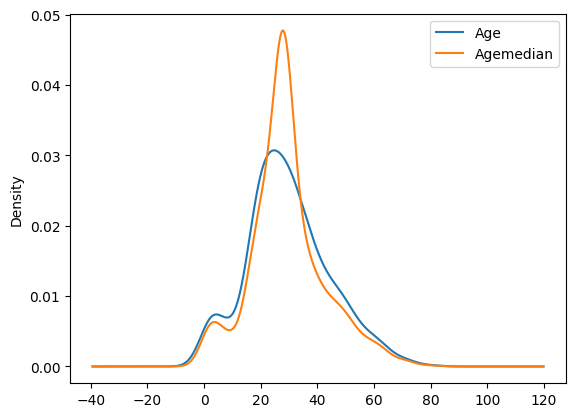

In [ ]:
df['Age'].plot(kind='kde',label='Age')
df['Agemedian'].plot(kind='kde',label='Agemedian')
plt.legend()
plt.show()

### 5.2.2 Random Sample Imputation:
   - **Method:** Randomly select values from the observed data to replace missing values.
   - **Use Case:** Suitable for situations where missingness is assumed to be completely random (MCAR), introducing randomness to avoid bias.

**Pros:**
* less change in original variance, less in  distortion variance
* easy to implement

**Cons:**
* every situation randomness won't work

In [ ]:
df = pd.read_csv(ds,usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
# selecting random non null value
# get randomly 177 (all null value count) non null values for imputation
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
def impute_nan(df,var):
    median = df[var].median()
    df[var+'median'] = df[var].fillna(median)
    df[var+'_random'] = df[var]
    random_sample = df[var].dropna().sample(df[var].isnull().sum(),random_state=2)
    random_sample.index = df[df[var].isnull()].index
    df.loc[df[var].isnull(),var+'_random'] = random_sample

In [ ]:
impute_nan(df,'Age')

In [ ]:
df.sample(5)

,Survived,Age,Fare,Agemedian,Age_random
639,0,NaN,16.100,28.0,19.0
745,0,70.0,71.000,70.0,70.0
90,0,29.0,8.050,29.0,29.0
659,0,58.0,113.275,58.0,58.0
795,0,39.0,13.000,39.0,39.0


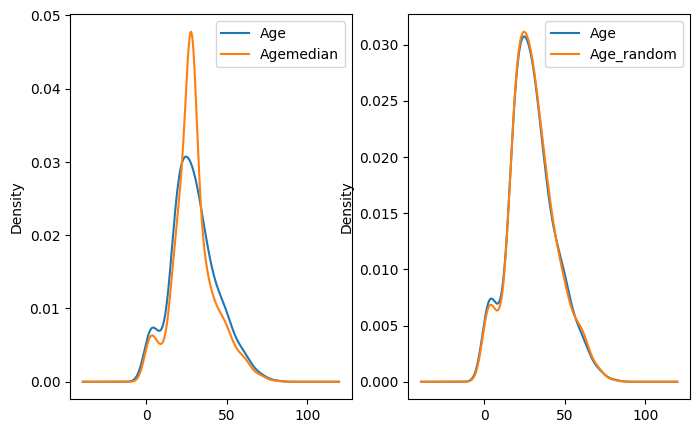

In [ ]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
df['Age'].plot(kind='kde',label='Age')
df['Agemedian'].plot(kind='kde',label='Agemedian')
plt.legend(loc='best')

plt.subplot(1,2,2)
df['Age'].plot(kind='kde',label='Age')
df['Age_random'].plot(kind='kde',label='Age_random')
plt.legend(loc='best')

plt.show()

### 5.2.3 Capturing NaN Values with a New Feature:
   - **Method:** Create a new binary feature indicating whether a value is missing (1) or not (0).
   - **Use Case:** Useful when the fact that a value is missing might carry information; allows models to learn patterns related to missingness.

**Pros:**
* easy to implement
* captures importance of missing values

**Cons:**
* increases the dimensionality

In [ ]:
df = pd.read_csv(ds,usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df['Age_nan'] = np.where(df['Age'].isnull(),1,0)
df['Age_nan'].mean()

0.19865319865319866

In [ ]:
df.Age.median()

28.0

In [ ]:
df.Age.fillna(df.Age.median(),inplace=True)

In [ ]:
# extra column Age_nan is created to give information to the model about missing values
df.head(5)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


### 5.2.4 End of Distribution Imputation:
   - **Method:** Replace missing values with values located at the end of the distribution of observed values.
   - **Use Case:** Suitable when missing values are assumed to be at the end of the distribution; useful for handling outliers and skewed distributions

**Pros:**
* easy to implement
* captures the importane of missingness if there is one

**Cons:**
* distorts original dist
* if missingness is not imp then it may mask predictive power of variable
* if count of NA is large it will mask true outliers
* if count of NA is small then imputed NA will be considered as outlier and may removed in subsequent process

In [ ]:
df = pd.read_csv(ds,usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


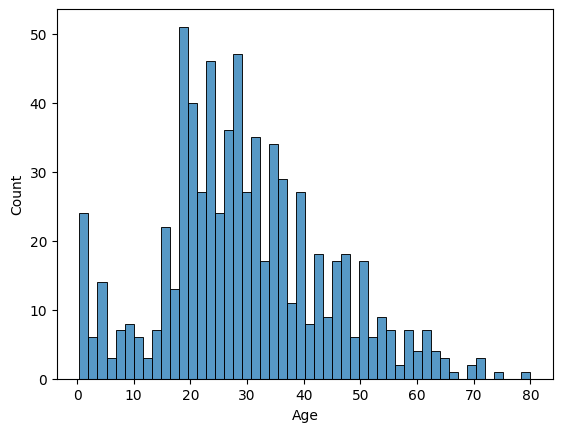

In [ ]:
sns.histplot(df['Age'],bins=50)
plt.show()

In [ ]:
age_mean = df.Age.mean()
age_mean

29.69911764705882

![image](https://www.simplypsychology.org/wp-content/uploads/normal-distribution-1024x640.jpeg)

In [ ]:
# take 3rd standard deviation from mean
extreme = age_mean+3*df.Age.std()

<Axes: >

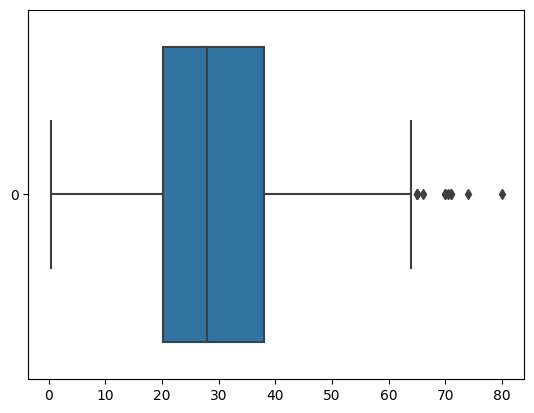

In [ ]:
sns.boxplot(df.Age,orient='h')

In [ ]:
def impute_nan(df,var,extreme):
    median = df[var].median()
    df[var+'_end_distribution'] = df[var].fillna(extreme)
    df[var].fillna(median,inplace=True)

In [ ]:
impute_nan(df,'Age',extreme)

In [ ]:
df.sample(5)

,Survived,Age,Fare,Age_end_distribution
288,1,42.0,13.0000,42.0
328,1,31.0,20.5250,31.0
92,0,46.0,61.1750,46.0
614,0,35.0,8.0500,35.0
156,1,16.0,7.7333,16.0


<Axes: xlabel='Age', ylabel='Count'>

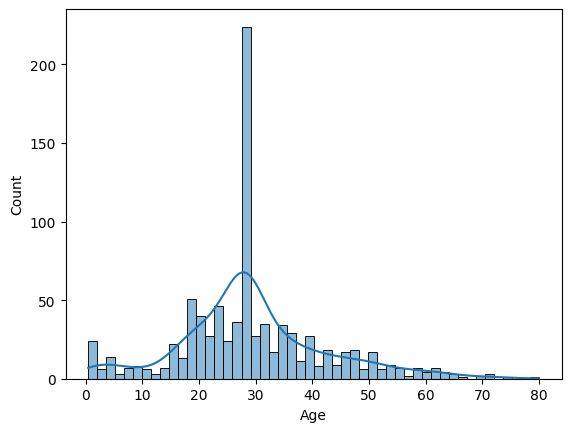

In [ ]:
sns.histplot(df.Age,bins=50,kde=True)
# creates large variance in the dataset

<Axes: xlabel='Age_end_distribution', ylabel='Count'>

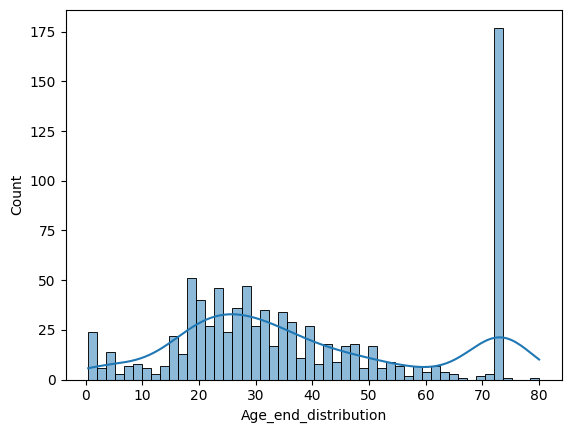

In [ ]:
sns.histplot(df.Age_end_distribution,bins=50,kde=True)

<Axes: >

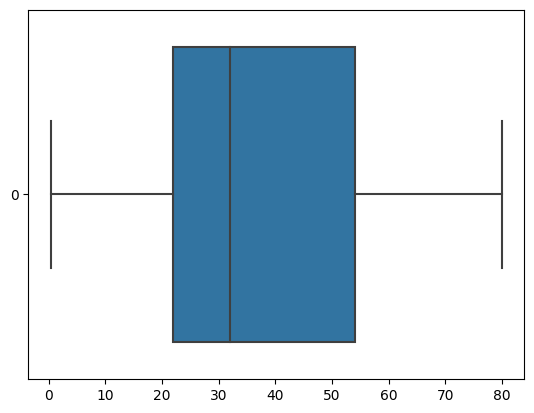

In [ ]:
sns.boxplot(df.Age_end_distribution,orient='h')
# outliers are not present

### 5.2.5 Arbitrary Imputation:
   - **Method:** Replace missing values with a predetermined constant or arbitrary value.
   - **Use Case:** Appropriate when you want to explicitly mark imputed values; use with caution, as it can introduce bias.

In [ ]:
df = pd.read_csv(ds,usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
def impute_nan(df,var):
    df[var+'_new'] = df[var].fillna(100)

In [ ]:
impute_nan(df,'Age')

## 5.3 Handling Missing Values in Categorical features

### 5.3.1 Frequent category imputation (mode imputation):
Frequent category imputation is a way to fill in missing values in a dataset by replacing them with the most common (or frequent) category in a categorical variable. In other words, if there are missing values in a categorical column, you replace those missing values with the category that appears most frequently in that column. This method is a simple and quick way to handle missing categorical data by essentially saying, "If I don't know the category, I'll assume it's the one I see most often in the dataset."

In [ ]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'house_prices.csv'),usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
# percentage of missing values
df.isnull().sum().apply(lambda x: round(x/df.shape[0]*100,3))

BsmtQual        2.534
FireplaceQu    47.260
GarageType      5.548
SalePrice       0.000
dtype: float64

In [ ]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

<Axes: xlabel='BsmtQual'>

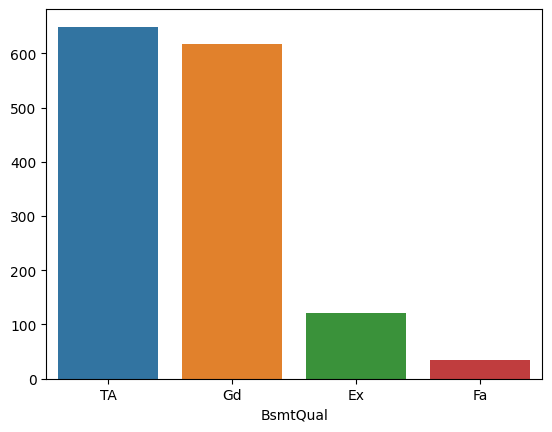

In [ ]:
sns.barplot(x=df['BsmtQual'].value_counts().index,y=df['BsmtQual'].value_counts().values)

<Axes: xlabel='FireplaceQu'>

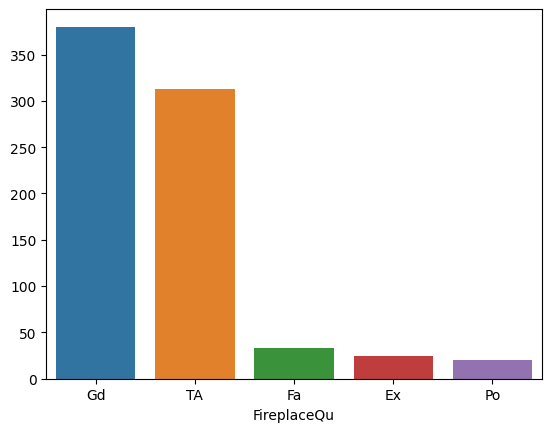

In [ ]:
sns.barplot(x=df['FireplaceQu'].value_counts().index,y=df['FireplaceQu'].value_counts().values)

<Axes: xlabel='GarageType'>

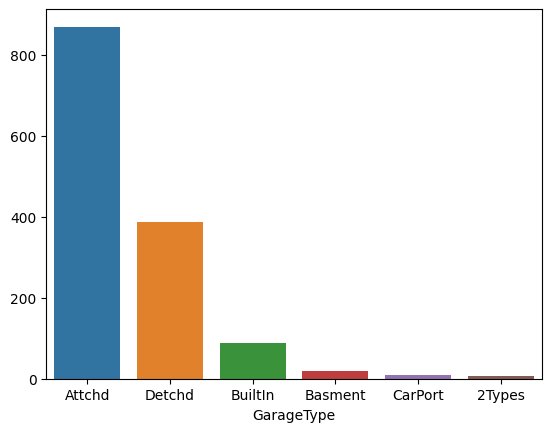

In [ ]:
sns.barplot(x=df['GarageType'].value_counts().index,y=df['GarageType'].value_counts().values)

In [ ]:
def impute_nan(df,var):
    mode = df[var].mode()[0]
    df[var].fillna(mode,inplace=True)

In [ ]:
impute_nan(df,'GarageType')
impute_nan(df,'FireplaceQu')
impute_nan(df,'BsmtQual')

In [ ]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

### 5.3.2 Capturing NaN values with a new feature

* Imagine you have a dataset, and some values are missing (NaN). Instead of filling in the missing values right away, you create a new column (feature) that acts as a "flag" or indicator. This new column takes a value of 1 if the original value is missing (NaN) and 0 if the original value is present.

* In simpler terms, it's like creating a special signpost for every missing value. If a piece of information is missing, you put up a sign (1) in the new column; if the information is there, no sign is needed (0).

* For example, if you have a survey where some people didn't provide their income, you create a new column called "Income_Missing." For each person with a missing income, you put a 1 in the "Income_Missing" column; for those with reported incomes, you put a 0.

In [ ]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'house_prices.csv'),usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
def impute_nan(df,var):
    df[var+'_nan'] = np.where(df[var].isnull(),1,0)
    mode = df[var].mode()[0]
    df[var].fillna(mode,inplace=True)

In [ ]:
impute_nan(df,'BsmtQual')

In [ ]:
impute_nan(df,'FireplaceQu')

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_nan,FireplaceQu_nan
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### 5.3.4 Making NaN as a new category (replacing NaN with new label)

In [ ]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'house_prices.csv'),usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
def impute_nan(df,var):
    df[var] = np.where(df[var].isnull(),'Missing',df[var])

In [ ]:
impute_nan(df,'BsmtQual')

In [ ]:
impute_nan(df,'FireplaceQu')

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


# 6. Handling imbalanced dataset

In [ ]:
def get_df(dataset,cols=None):
    ds_path = 'G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets'
    df = pd.read_csv(os.path.join(ds_path,dataset),usecols=cols)
    return df

In [ ]:
df = get_df('diabetes_dataset.csv')

In [ ]:
df = get_df('diabetes_dataset.csv')

In [ ]:
df = df.drop(['gender','smoking_history'],axis=1)

In [ ]:
df.columns = ['age', 'hypertension', 'heart_disease',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'Class']

In [ ]:
df.shape

(100000, 7)

In [ ]:
df.isnull().sum()

age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
Class                  0
dtype: int64

In [ ]:
df['Class'].value_counts()

Class
0    91500
1     8500
Name: count, dtype: int64

## 6.1 Ensemble methods

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
X = df.drop('Class',axis=1)
y = df['Class']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rf_clf = RandomForestClassifier(n_estimators=25)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

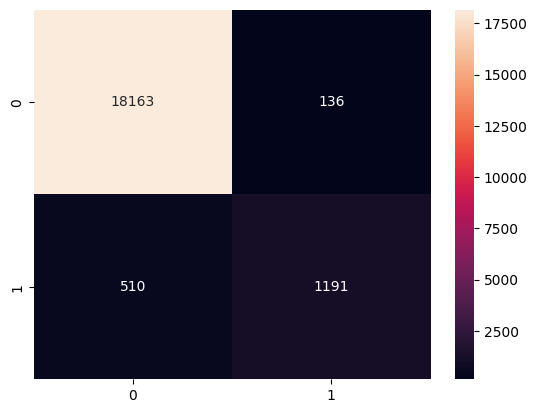

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18299
           1       0.90      0.70      0.79      1701

    accuracy                           0.97     20000
   macro avg       0.94      0.85      0.88     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
# give weight 1 to class 0 and give weight 100 to class 1
# class_weights is hyperparameter in randomforest
class_weights = dict({
    0: 1,
    1: 100
})

## 6.2 Under sampling majority class

### 6.2.1 Using pandas sample method

In [ ]:
df_minority_class = df[df['Class']==1] 
df_majority_class = df[df['Class']==0]

In [ ]:
df_under_sampled = df_majority_class.sample(df_minority_class.shape[0])

In [ ]:
combined_df = pd.concat([df_minority_class,df_under_sampled])

In [ ]:
combined_df.shape

(17000, 7)

In [ ]:
X = combined_df.drop('Class',axis=1)
y = combined_df['Class']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rf_clf = RandomForestClassifier(n_estimators=25)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

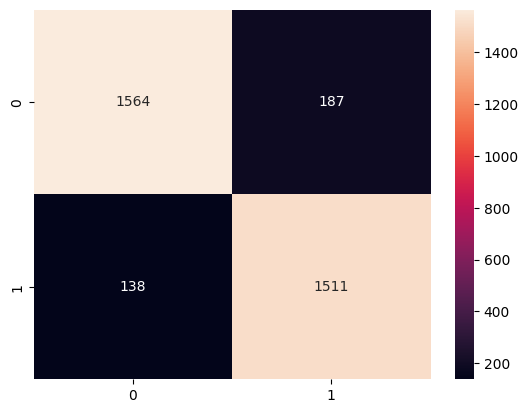

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1751
           1       0.89      0.92      0.90      1649

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



### 6.2.2 Using imblearn module

In [ ]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [ ]:
X = df.drop('Class',axis=1)
y = df['Class']

In [ ]:
# minority class will be 80% of majority class
# 506*0.8 (majority) = 405 (minority)
ns = NearMiss(sampling_strategy=0.8)
X_train_ns,y_train_ns = ns.fit_resample(X,y)

In [ ]:
Counter(y_train_ns)

Counter({0: 10625, 1: 8500})

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train_ns,y_train_ns,test_size=0.2,random_state=1)
rf_clf = RandomForestClassifier(n_estimators=25)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train_ns,y_train_ns,test_size=0.2,random_state=1)
rf_clf = RandomForestClassifier(n_estimators=25)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2172
           1       0.89      0.82      0.85      1653

    accuracy                           0.88      3825
   macro avg       0.88      0.87      0.88      3825
weighted avg       0.88      0.88      0.88      3825



## 6.3 Over sampling minority class

### 6.3.1 Random over sampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
X = df.drop('Class',axis=1)
y = df['Class']

In [ ]:
ros = RandomOverSampler(sampling_strategy=0.9)
X,y = ros.fit_resample(X,y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rf_clf = RandomForestClassifier(n_estimators=25)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

In [ ]:
Counter(y)

Counter({0: 91500, 1: 82350})

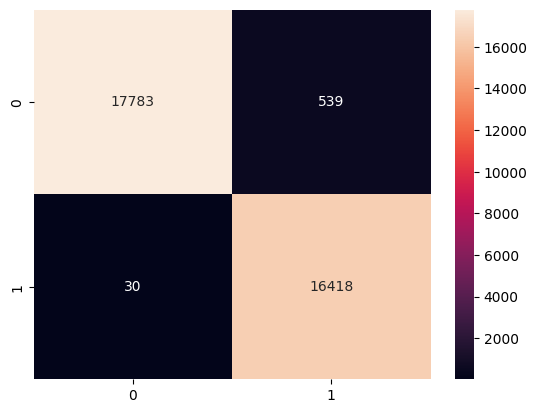

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18322
           1       0.97      1.00      0.98     16448

    accuracy                           0.98     34770
   macro avg       0.98      0.98      0.98     34770
weighted avg       0.98      0.98      0.98     34770



### 6.3.2 SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X = df.drop('Class',axis=1)
y = df['Class']

In [ ]:
smote = SMOTE(sampling_strategy=0.9)
X,y = smote.fit_resample(X,y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rf_clf = RandomForestClassifier(n_estimators=25)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

In [ ]:
Counter(y)

Counter({0: 91500, 1: 82350})

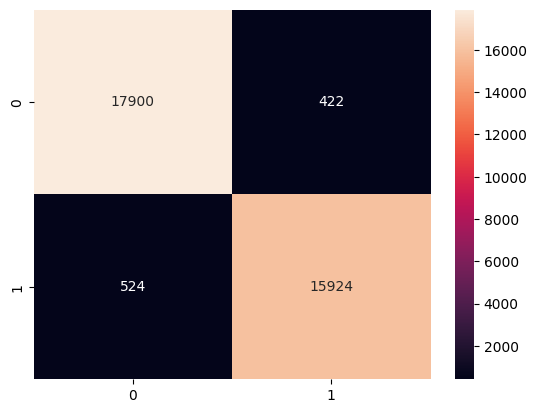

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     18322
           1       0.97      0.97      0.97     16448

    accuracy                           0.97     34770
   macro avg       0.97      0.97      0.97     34770
weighted avg       0.97      0.97      0.97     34770



### 6.3.3 SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
X = df.drop('Class',axis=1)
y = df['Class']

In [ ]:
smotetomek = SMOTETomek(sampling_strategy=0.95)
X,y = smotetomek.fit_resample(X,y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
rf_clf = RandomForestClassifier(n_estimators=25)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

In [ ]:
Counter(y)

Counter({0: 90749, 1: 86174})

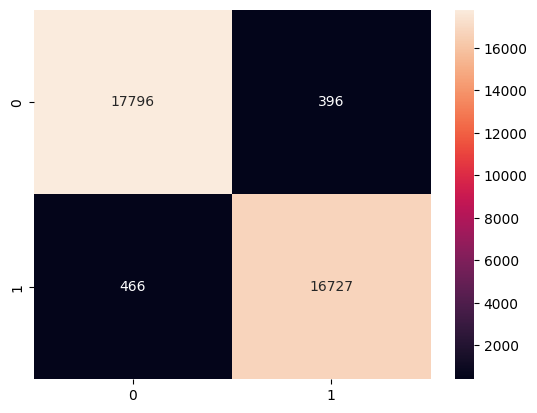

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18192
           1       0.98      0.97      0.97     17193

    accuracy                           0.98     35385
   macro avg       0.98      0.98      0.98     35385
weighted avg       0.98      0.98      0.98     35385



# 7. Handling outliers

In [ ]:
def get_df(dataset,cols=None):
    ds_path = 'G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets'
    df = pd.read_csv(os.path.join(ds_path,dataset),usecols=cols)
    return df

In [ ]:
df = get_df('titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 7.1 Gaussian (Normal) distribution

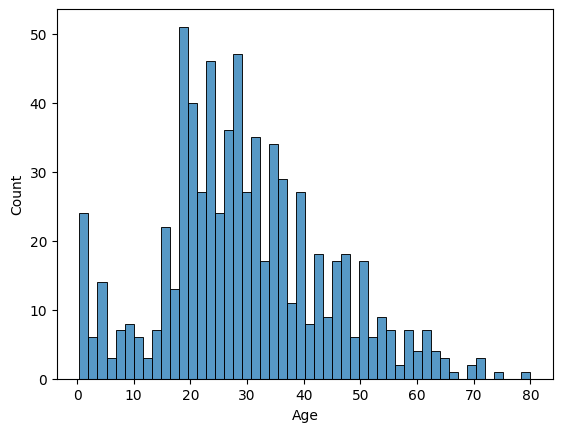

In [ ]:
sns.histplot(df['Age'],bins=50)
plt.show()

<Axes: >

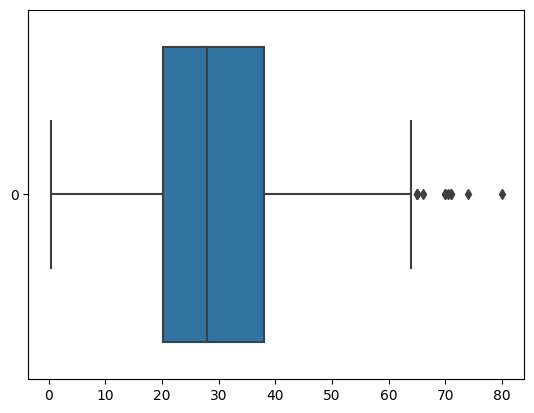

In [ ]:
sns.boxplot(df['Age'],orient='h')

In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### 7.1.1 3 Standard deviation

In [ ]:
age_mean = df.Age.mean()
upper_bound = age_mean + 3*df.Age.std()
lower_bound = age_mean - 3*df.Age.std()
print('Mean: ',age_mean)
print('Upper bound: ',upper_bound)
print('Lower bound: ',lower_bound)

Mean:  29.69911764705882
Upper bound:  73.27860964406094
Lower bound:  -13.880374349943303


In [ ]:
df['Age'].dropna(inplace=True)
age_series = df[(lower_bound<=df['Age'])&(df['Age']<=upper_bound)]

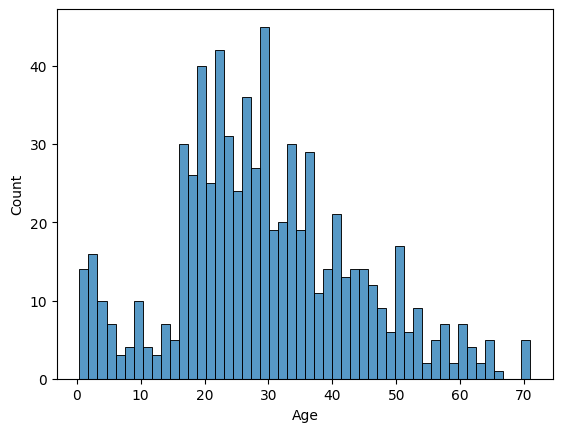

In [ ]:
sns.histplot(age_series['Age'],bins=50)
plt.show()

### 7.1.2 Z-score

In [ ]:
from scipy.stats import zscore

In [ ]:
df['Age_zscore'] = zscore(df['Age'].dropna())
z_threshold = 3
age_series = df[np.abs(df['Age_zscore'])<=z_threshold]

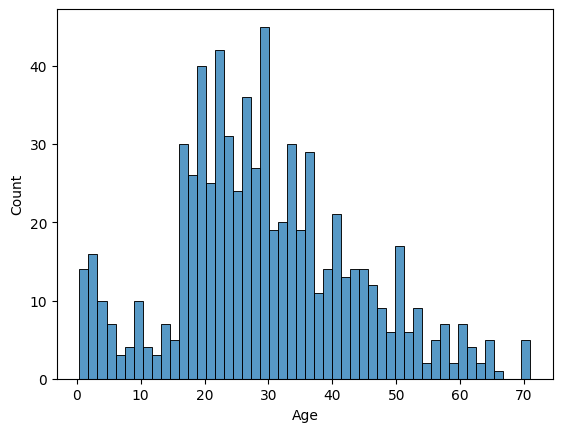

In [ ]:
sns.histplot(age_series['Age'],bins=50)
plt.show()

## 7.2 Skewed distribution

### 7.2.1 IQR (Interquantile range)

In [ ]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
lower = df.Fare.quantile(0.25) - (IQR*1.5)
upper = df.Fare.quantile(0.75) + (IQR*1.5)
print('IQR: ',IQR)
print('Lowr bound: ',lower)
print('Upper bound: ',upper)

IQR:  23.0896
Lowr bound:  -26.724
Upper bound:  65.6344


In [ ]:
# Extreme outliers
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
lower = df.Fare.quantile(0.25) - (IQR*3)
upper = df.Fare.quantile(0.75) + (IQR*3)
print('IQR: ',IQR)
print('Lowr bound: ',lower)
print('Upper bound: ',upper)

IQR:  23.0896
Lowr bound:  -61.358399999999996
Upper bound:  100.2688


In [ ]:
#replacing outlier by extreme value
df[df['Fare']>=100] = 100

In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_zscore
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.7750,NaN,S,-0.599265
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S,0.020727
354,355,0,3,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN
379,380,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,NaN,S,-0.737041
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,1.329599


# 8. Scaling

In [7]:
def get_df(dataset,cols=None):
    ds_path = 'G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets'
    df = pd.read_csv(os.path.join(ds_path,dataset),usecols=cols)
    return df

## 8.1 When to use transformation

* Linear regression- gradient descent --global minima
* KNN, K Means, hierarchical clustering --euclean distance
* Neural networks

## 8.2 Standardization and Normalization

We try to bring all the variables or features  to a similar scale. Standardization means centering variable at zero

z = (x - x_mean) / std

In [10]:
df = get_df('titanic.csv',cols=['Pclass','Age','Fare','Survived'])

In [11]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [13]:
df.Age.fillna(df.Age.median(),inplace=True)

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

### 8.2.1 Standard Scaler

In [15]:
from sklearn.preprocessing import StandardScaler

**fit vs fit_transform**
It applies transformation column wise feature by feature

**Fit:**

When you use the "fit" method on a transformer, you are essentially calculating the parameters needed for that particular transformation based on the data you provide.
For example, if you're using a scaler (e.g., StandardScaler), calling fit calculates the mean and standard deviation of the data. These parameters are then used to transform the data.
The "fit" method is used to learn the parameters of a model or transformation from the training data.

**Fit_Transform:**

The "fit_transform" method combines the "fit" and "transform" steps into a single operation.
It first calculates the parameters using the "fit" step and then applies the transformation to the data in a single step.
This can be more efficient than calling "fit" and then "transform" separately, especially when working with large datasets.

In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)

In [17]:
df_scaled.head()

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


<Axes: xlabel='1', ylabel='Count'>

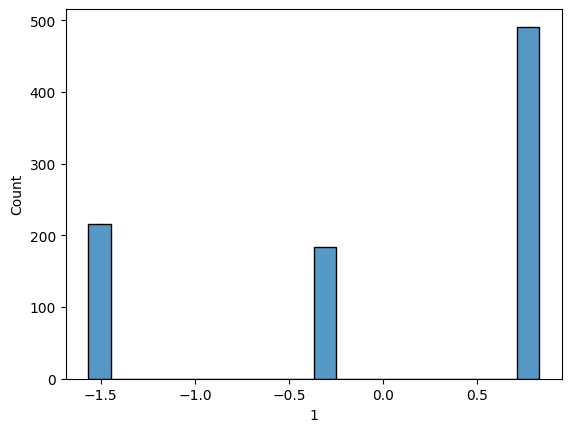

In [18]:
sns.histplot(df_scaled.iloc[:,1],bins=20)

<Axes: xlabel='2', ylabel='Count'>

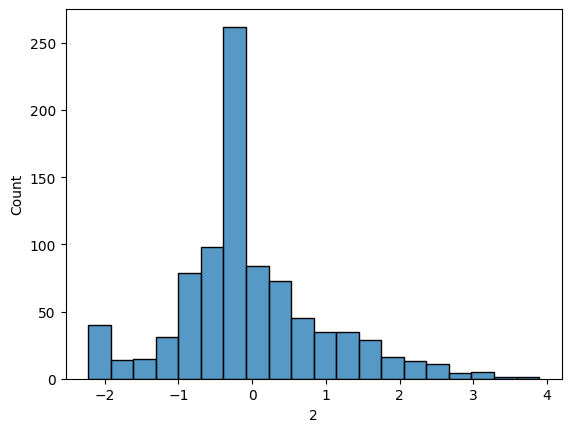

In [19]:
sns.histplot(df_scaled.iloc[:,2],bins=20)

<Axes: xlabel='3', ylabel='Count'>

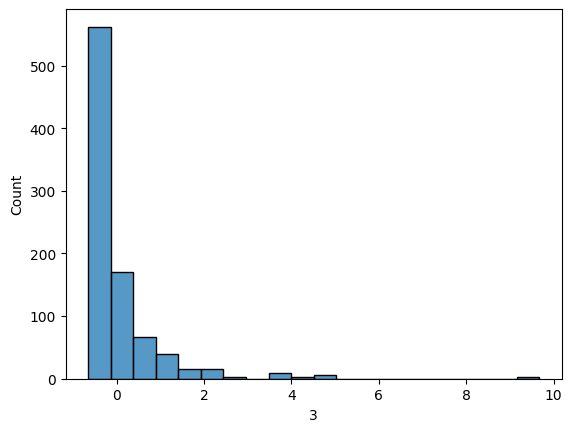

In [20]:
sns.histplot(df_scaled.iloc[:,3],bins=20)

### 8.2.2 Min Max Scaler

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
# range 0 to 1
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [23]:
df_scaled.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


<Axes: xlabel='Pclass', ylabel='Count'>

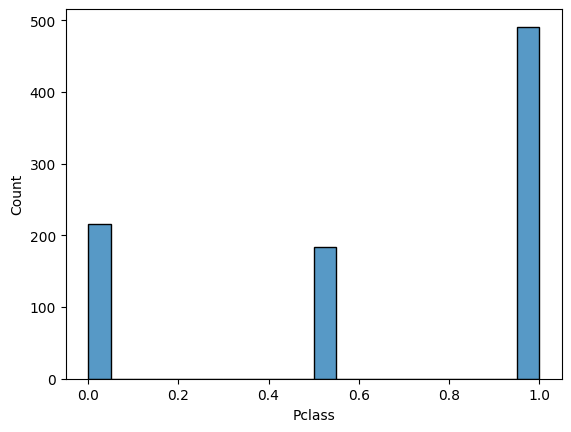

In [24]:
sns.histplot(df_scaled['Pclass'],bins=20)

<Axes: xlabel='Age', ylabel='Count'>

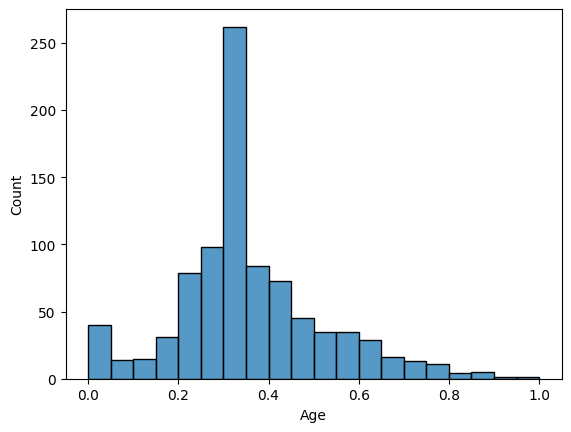

In [25]:
sns.histplot(df_scaled['Age'],bins=20)

<Axes: xlabel='Fare', ylabel='Count'>

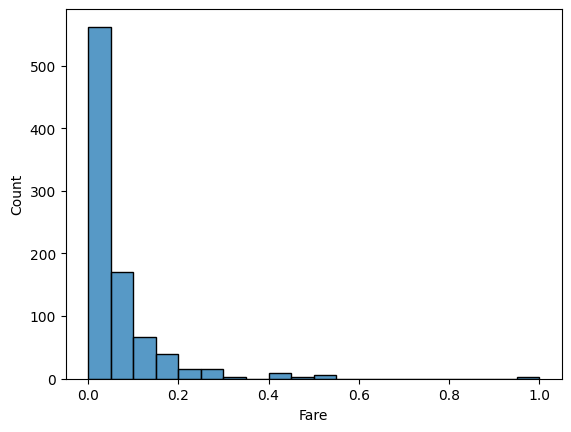

In [26]:
sns.histplot(df_scaled['Fare'],bins=20)

### 8.2.3 Robust Scaler

IQR = 75th quantile - 25th quantile
X_scaled = (X-X.median)/IQR

In [27]:
from sklearn.preprocessing import RobustScaler

In [28]:
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

<Axes: xlabel='Pclass', ylabel='Count'>

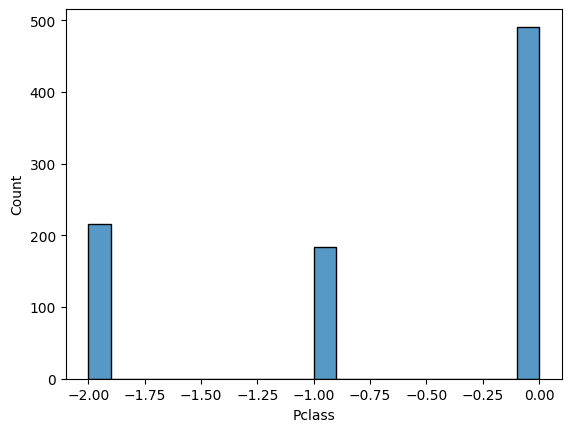

In [29]:
sns.histplot(df_scaled['Pclass'],bins=20)

<Axes: xlabel='Age', ylabel='Count'>

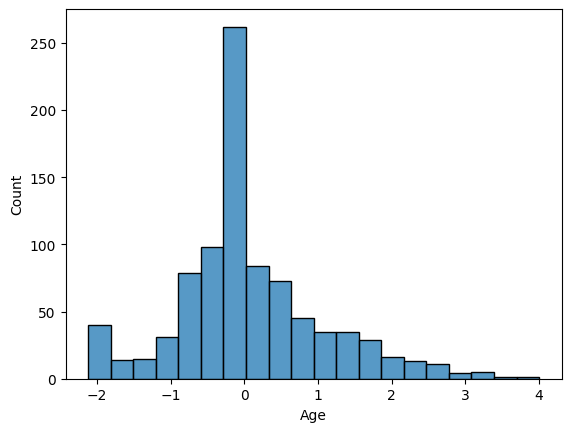

In [30]:
sns.histplot(df_scaled['Age'],bins=20)

<Axes: xlabel='Fare', ylabel='Count'>

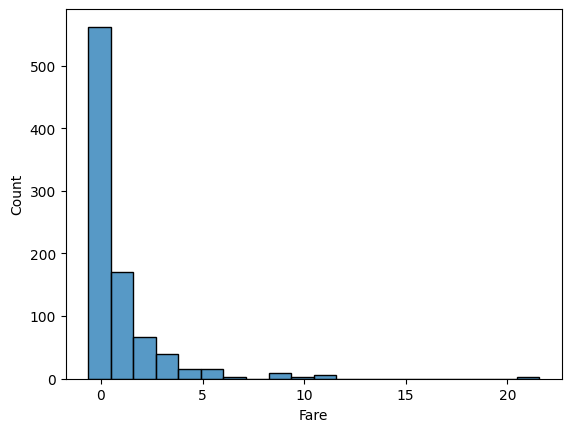

In [31]:
sns.histplot(df_scaled['Fare'],bins=20)

## 8.3 Gaussian Transformation
**Any transformation to normal distribution**

### 8.3.1 Logarithmic Transformation

In [32]:
df = get_df('titanic.csv',cols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [33]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [34]:
import scipy.stats as stat
import pylab

In [35]:
def get_plot(df,var):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df[var],bins=20)
    plt.subplot(1,2,2)
    stat.probplot(df[var],dist='norm',plot=pylab)
    plt.tight_layout()
    plt.show()

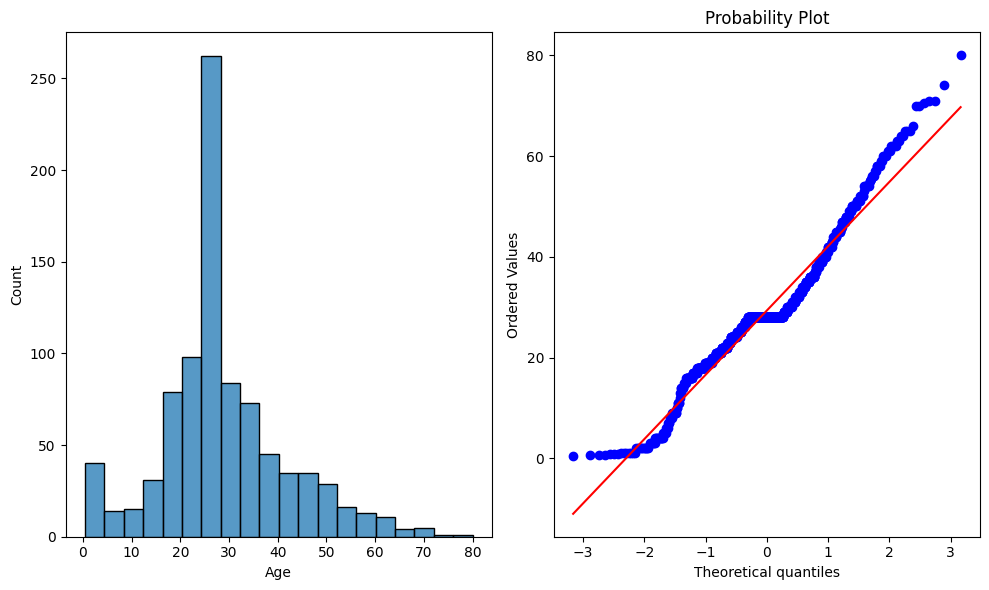

In [36]:
df['Age_log'] = np.log(df['Age'])
get_plot(df,'Age')

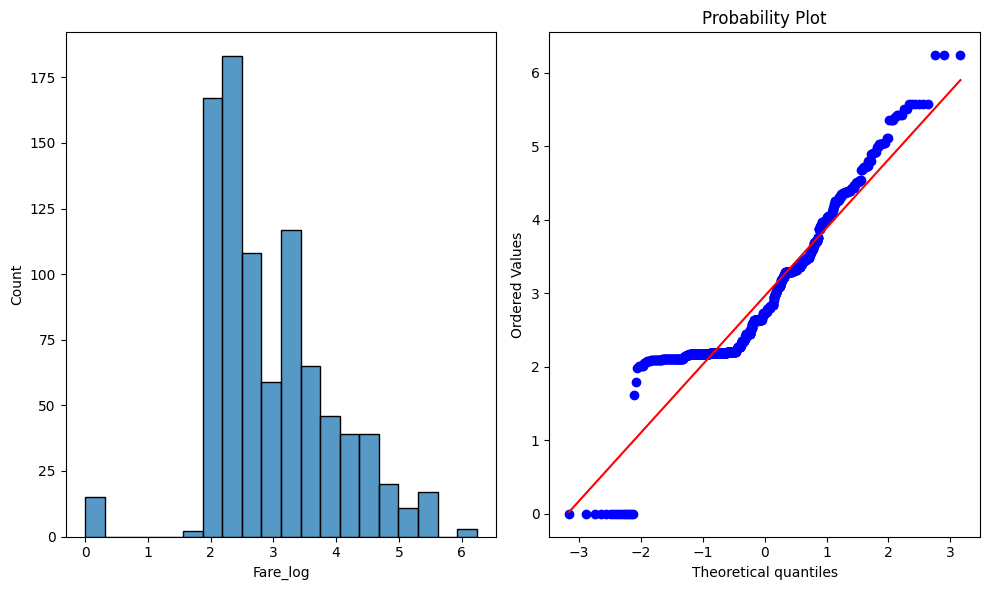

In [37]:
df['Fare_log'] = np.log1p(df['Fare'])
get_plot(df,'Fare_log')

### 8.3.2 Reciprocal Transformation

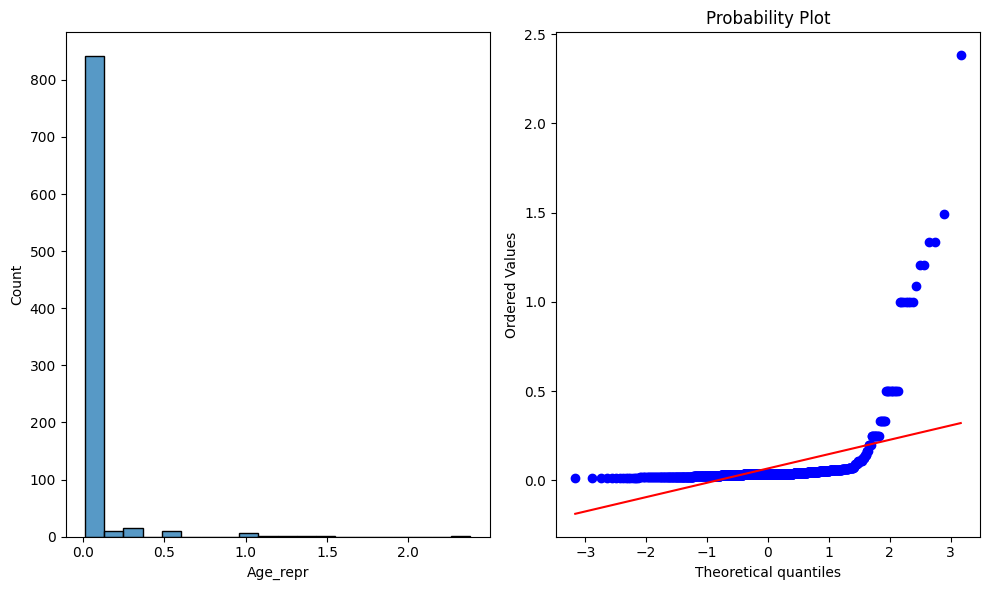

In [38]:
df['Age_repr'] = 1/df['Age']
get_plot(df,'Age_repr')

### 8.3.3 Square root Transformation

In [39]:
import math

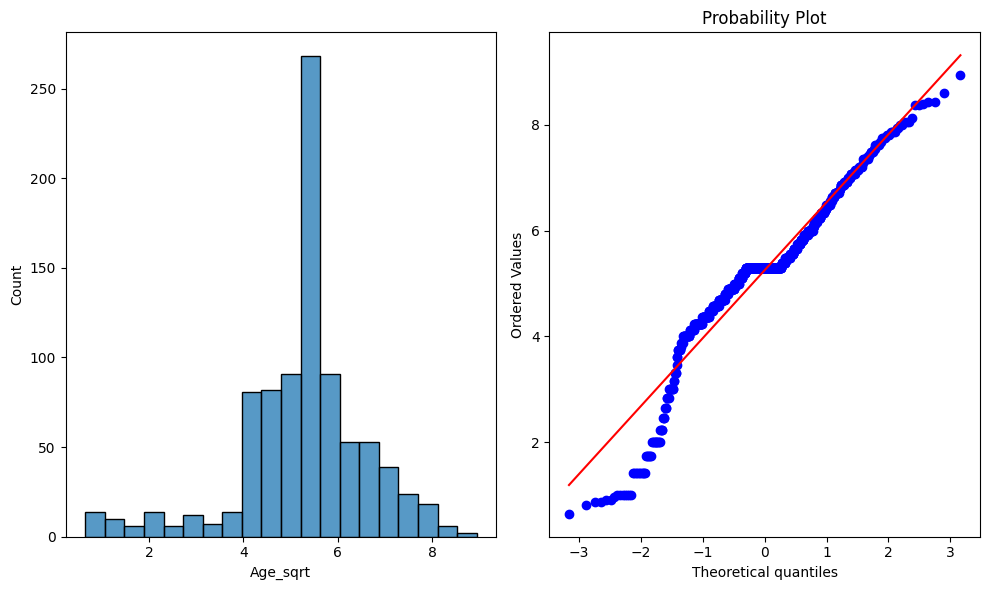

In [40]:
df['Age_sqrt'] = df['Age'].apply(lambda x: math.sqrt(x))
get_plot(df,'Age_sqrt')

### 8.3.4 Exponential Transformation

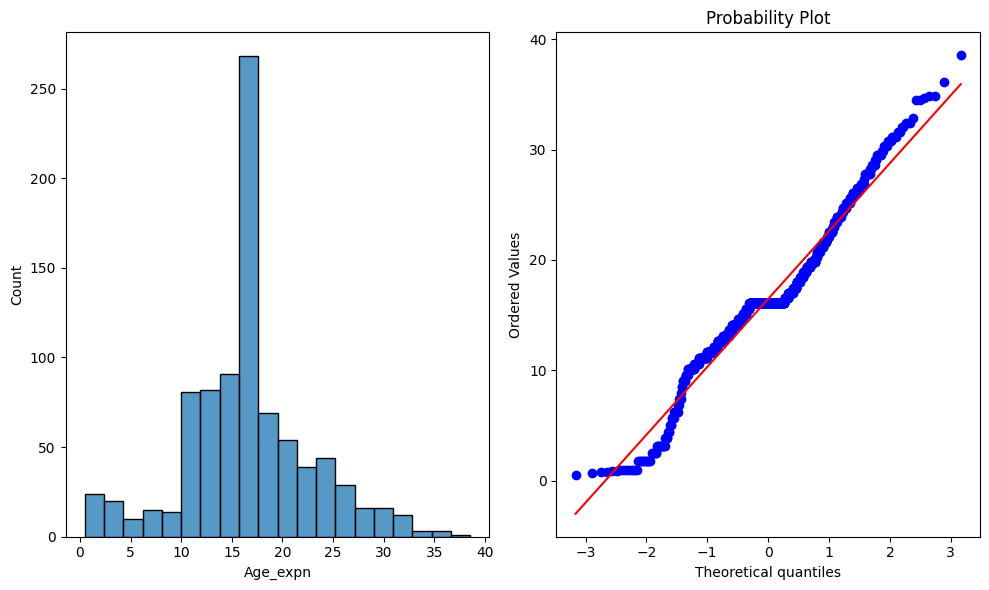

In [41]:
df['Age_expn'] = df['Age']**(1/1.2)
get_plot(df,'Age_expn')

### 8.3.5 BoxCox Transformation

![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSa_gNJKVxWSczYNRMUtj88fZxKSdRbCyCuuTZzJrbms7S6MoAY&s=10)

In [42]:
df['Age_boxcox'],parameters = stat.boxcox(df['Age'])

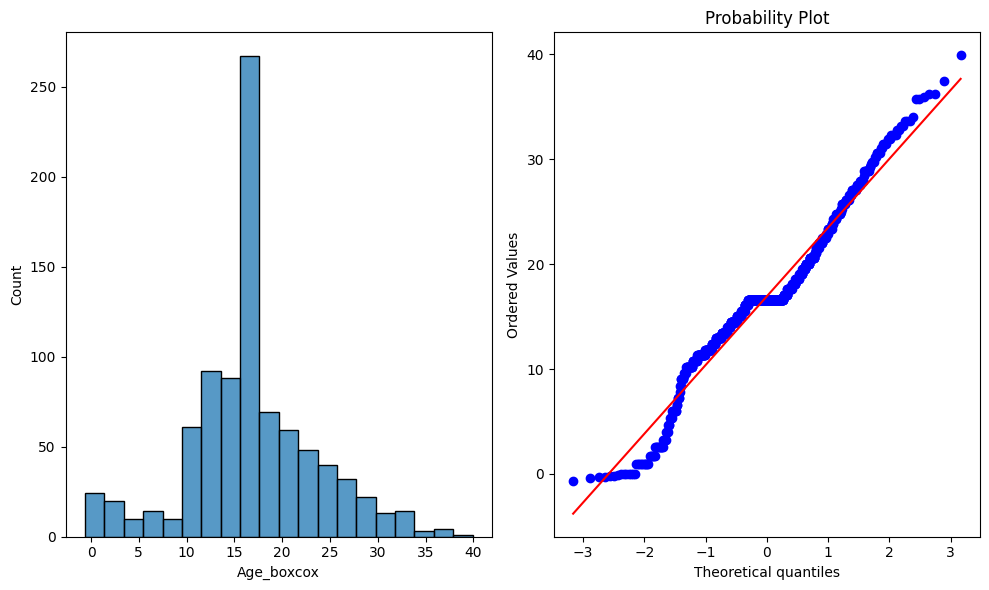

In [43]:
get_plot(df,'Age_boxcox')

# 9. Encoding categorical features

## 9.1 Nomnial categorical features

### 9.1.1 Categorical variables with 2 categories

In [ ]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'titanic.csv'),usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
ohe = OneHotEncoder(sparse_output=False)

In [ ]:
new_df = pd.DataFrame(ohe.fit_transform(df),columns=[np.unique(df['Sex'])])

In [ ]:
new_df

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [ ]:
df = pd.concat([df,new_df],axis=1)

In [ ]:
df.head()

,Sex,"(female,)","(male,)"
0,male,0.0,1.0
1,female,1.0,0.0
2,female,1.0,0.0
3,female,1.0,0.0
4,male,0.0,1.0


### 9.1.2 Categorical features with multiple categories
Replacing by top 10 features

In [ ]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'mercedes.csv'),usecols=['X0','X1'])
df.head()

,X0,X1
0,k,v
1,k,t
2,az,w
3,az,t
4,az,v


In [ ]:
lst_10 = list(df['X1'].value_counts()[:10].index)

In [ ]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [ ]:
for category in lst_10:
    df['X1_'+category] = np.where(df['X1']==category,1,0)

In [ ]:
df.sample(5)

,X0,X1,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
2364,e,s,0,1,0,0,0,0,0,0,0,0
28,f,s,0,1,0,0,0,0,0,0,0,0
105,x,r,0,0,0,0,0,1,0,0,0,0
141,j,aa,1,0,0,0,0,0,0,0,0,0
364,f,s,0,1,0,0,0,0,0,0,0,0


## 9.2 Ordinal categorical features

### 9.2.1 Simple encoding

In [ ]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'titanic.csv'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()

In [ ]:
df['Embarked_new'] = label.fit_transform(df['Embarked'])

### 9.2.2 Count of Frequency encoding

In [ ]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'mumbai.csv'),usecols=['Furnished_status','Status','neworold'])
df.head()

,Status,neworold,Furnished_status
0,Under Construction,New Property,NaN
1,Under Construction,New Property,NaN
2,Under Construction,New Property,NaN
3,Ready to Move,New Property,NaN
4,NaN,New Property,Unfurnished


In [ ]:
df.columns

Index(['Status', 'neworold', 'Furnished_status'], dtype='object')

In [ ]:
df['Status'].value_counts()

Status
Ready to Move         5771
Under Construction       3
Name: count, dtype: int64

In [ ]:
df['Status'].shape[0]/df['Status'].isna().sum()

13.004158004158004

In [ ]:
df['Status'].fillna(df['Status'].mode()[0],inplace=True)

In [ ]:
d = df['Status'].value_counts().to_dict()

In [ ]:
df['Status'] = df['Status'].map(d)

**Pros:**
* easy to use
* not increasing any feature space

**Cons:**
* it will provide same weight if the frequencies are same

### 9.2.3 Target Guided Ordinal Encoding
* ordering the labels according to the target
* replace labels by the joint probability of being 1 or 0

In [ ]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'titanic.csv'),usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
df['Cabin'].fillna('Missing',inplace=True)

In [ ]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [ ]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [ ]:
set(df['Cabin'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T'}

In [ ]:
labels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [ ]:
mapping = { labels[i]: i for i in range(len(list(labels)))}
mapping

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [ ]:
df['Cabin'] = df['Cabin'].map(mapping)

### 9.2.4 Mean encoding

In [ ]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'titanic.csv'),usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
df['Cabin'].fillna('Missing',inplace=True)

In [ ]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [ ]:
labels_mapping = df.groupby(['Cabin'])['Survived'].mean().to_dict()
labels_mapping

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [ ]:
df['Cabin'] = df['Cabin'].map(labels_mapping)

In [ ]:
df.head()

,Survived,Cabin
0,0,0.299854
1,1,0.593220
2,1,0.299854
3,1,0.593220
4,0,0.299854


### 9.2.5 Probability ratio encoding

In [ ]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'titanic.csv'),usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
df['Cabin'].fillna('Missing',inplace=True)

In [ ]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [ ]:
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])

In [ ]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
##find the percentage of the survived based on cabin
prob_df = df.groupby(['Cabin'])['Survived'].mean()

In [ ]:
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [ ]:
prob_df['died'] = 1-prob_df['Survived']
prob_df

,Survived,died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


In [ ]:
#probability of survived/died
prob_df['ratio'] = prob_df['Survived']/prob_df['died']
prob_df

,Survived,died,ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


In [ ]:
prob_dict = {prob_df.index[i]: prob_df.iloc[i,-1] for i in range(prob_df.shape[0])}

In [ ]:
prob_dict

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [ ]:
df['Cabin'] = df['Cabin'].map(prob_dict)

In [ ]:
df.head()

,Survived,Cabin
0,0,0.428274
1,1,1.458333
2,1,0.428274
3,1,1.458333
4,0,0.428274


# 10. Feature selection

### 10.1 Removing constant features using variance threshold

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [ ]:
df = pd.DataFrame({
    'A': [1,3,5,6,2],
    'B': [9,8,4,5,6],
    'C': [0,0,0,0,0],
    'D': [1,1,1,1,1]
})

In [ ]:
df.head()

,A,B,C,D
0,1,9,0,1
1,3,8,0,1
2,5,4,0,1
3,6,5,0,1
4,2,6,0,1


In [ ]:
var_thres = VarianceThreshold(threshold = 0) # threshold means how much variation we want
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [ ]:
const_cols  = [col for col in df.columns if col not in df.columns[var_thres.get_support()]]
len(const_cols)

2

In [ ]:
const_cols

['C', 'D']

### 10.2 Dropping features using Pearson Correlation

In [ ]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data=data.data, columns = data.feature_names)

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
X = df.drop(['AveOccup'],axis = 1)
y = df['AveOccup']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

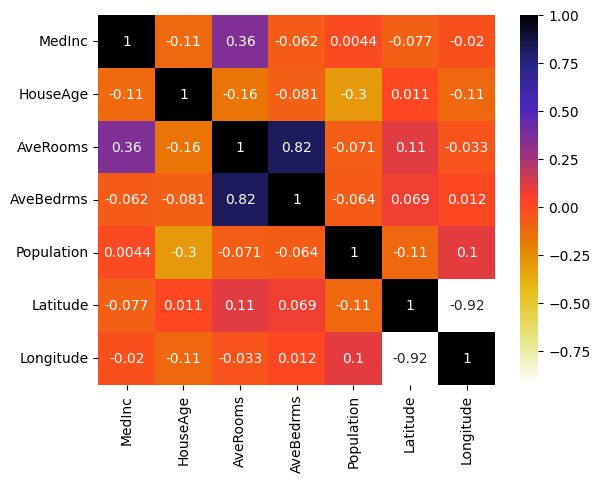

In [ ]:
sns.heatmap(X_train.corr(),annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def get_correlated_cols(dataset,threshold=0.85):
    corr_mat = dataset.corr()
    cols_name = set()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if (corr_mat.iloc[i,j])>threshold:
                cols_name.add(corr_mat.columns[i])
    return cols_name
    

In [ ]:
get_correlated_cols(X_train,0.7)

{'AveBedrms'}

### 10.3 Information gain for classification

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine

In [ ]:
data = load_wine()
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
df['target'] = data.target

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
X = df.drop(['target'],axis = 1)
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info # ranges 0 to 1 higher is better

array([0.49354954, 0.32499453, 0.06933511, 0.30502464, 0.16708749,
       0.44653593, 0.68442412, 0.11952798, 0.32120623, 0.5898984 ,
       0.41139423, 0.48568505, 0.56413841])

In [ ]:
mutual_info = pd.Series(mutual_info)

In [ ]:
mutual_info_sorted = mutual_info.sort_values(ascending=False)

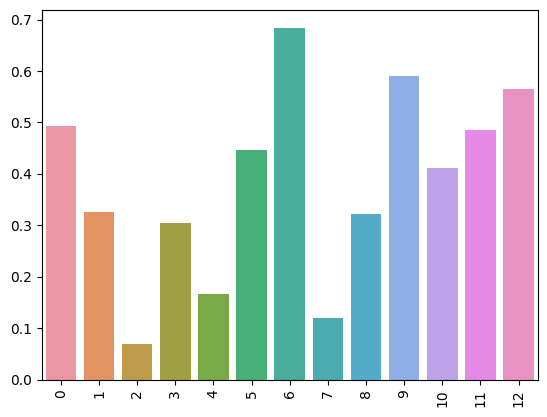

In [ ]:
sns.barplot(x=mutual_info_sorted.index,y=mutual_info_sorted)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
select_cols = SelectKBest(mutual_info_classif,k=10)
select_cols.fit(X_train,y_train)
X_train.columns[select_cols.get_support()]

Index(['alcohol', 'malic_acid', 'alcalinity_of_ash', 'total_phenols',
       'flavanoids', 'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

### 10.4 Information gain for regression problem

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data=data.data,columns = data.feature_names)

In [ ]:
df['price'] = data.target

In [ ]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression, SelectPercentile
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['price'],axis=1)
y = df['price']
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
mic = mutual_info_regression(X_train,y_train)

In [ ]:
mic = pd.Series(mic)
mic.index = X_train.columns
mic = mic.sort_values(ascending=False)

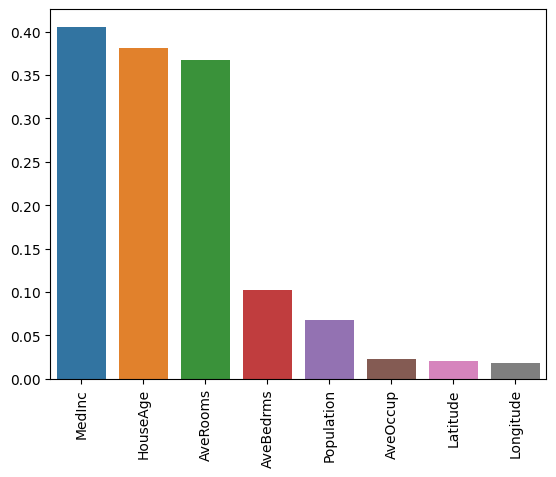

In [ ]:
sns.barplot(x=X_train.columns,y=mic)
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_cols = SelectPercentile(mutual_info_regression,percentile=20)
top_cols.fit(X_train,y_train)
X_train.columns[top_cols.get_support()]

Index(['MedInc', 'Longitude'], dtype='object')

### 10.5 CHI square test

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
ds_path = 'G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets'
df = pd.read_csv(os.path.join(ds_path,'titanic.csv'))

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
cat_cols = ['Sex','Embarked','Pclass','Survived']
cat_cols

['Sex', 'Embarked', 'Pclass', 'Survived']

In [ ]:
df = df[cat_cols]

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])

In [ ]:
df['Embarked'] = labelencoder.fit_transform(df['Embarked'])

In [ ]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train.head()

,Sex,Embarked,Pclass
30,1,0,1
10,0,2,3
873,1,2,3
182,1,2,3
876,1,2,3


In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
# chi2 returns 2 vlaues 
# f-score p-value
fp_vals = chi2(X_train,y_train)

In [ ]:
p_vals = pd.Series(fp_vals[1])
p_vals.index = X_train.columns
p_vals = p_vals.sort_values(ascending =True)

In [ ]:
p_vals

Sex         2.009393e-18
Pclass      1.139328e-06
Embarked    1.081017e-02
dtype: float64

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [ ]:
df = pd.DataFrame({
    'A': [1,3,5,6,2],
    'B': [9,8,4,5,6],
    'C': [0,0,0,0,0],
    'D': [1,1,1,1,1]
})

In [ ]:
df.head()

,A,B,C,D
0,1,9,0,1
1,3,8,0,1
2,5,4,0,1
3,6,5,0,1
4,2,6,0,1


In [ ]:
var_thres = VarianceThreshold(threshold = 0) # threshold means how much variation we want
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [ ]:
const_cols  = [col for col in df.columns if col not in df.columns[var_thres.get_support()]]
len(const_cols)

2

In [ ]:
const_cols

['C', 'D']